In [8]:
import yfinance as yf 
import pandas as pd 
import csv 
import numpy as np 

In [9]:
#Load the Data
df_list=[]
with open('Symbols List.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        symbol = row[0] # Récupérer le symbole de l'action dans la première colonne
        data = yf.download(symbol, start='2021-01-01', end='2023-03-01')
        data['SYMBOL'] = symbol # Ajouter une colonne "symbol" pour stocker le symbole de l'action
        df_list.append(data)

STOCK = pd.concat(df_list)



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SYMBOL: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*****

In [10]:
STOCK = STOCK.reset_index()



In [11]:
STOCK

,Date,Open,High,Low,Close,Adj Close,Volume,SYMBOL
0,2021-01-04,118.940002,120.089996,117.110001,118.639999,117.039726,2030700.0,A
1,2021-01-05,118.480003,120.320000,118.070000,119.610001,117.996643,2344000.0,A
2,2021-01-06,118.690002,123.879997,118.209999,122.889999,121.232391,2428500.0,A
3,2021-01-07,124.330002,127.480003,124.110001,126.160004,124.458290,1775900.0,A
4,2021-01-08,126.489998,127.639999,125.849998,127.059998,125.346153,1577200.0,A
...,...,...,...,...,...,...,...,...
2956309,2023-02-22,12.570000,12.760000,12.350000,12.540000,12.540000,181200.0,ZYXI
2956310,2023-02-23,12.690000,12.970000,12.490000,12.630000,12.630000,120600.0,ZYXI
2956311,2023-02-24,12.540000,12.820000,12.310000,12.820000,12.820000,151800.0,ZYXI
2956312,2023-02-27,12.930000,13.070000,12.560000,12.830000,12.830000,103200.0,ZYXI


In [12]:
STOCK = STOCK.set_index('SYMBOL')


In [13]:
STOCK

,Date,Open,High,Low,Close,Adj Close,Volume
SYMBOL,,,,,,,
A,2021-01-04,118.940002,120.089996,117.110001,118.639999,117.039726,2030700.0
A,2021-01-05,118.480003,120.320000,118.070000,119.610001,117.996643,2344000.0
A,2021-01-06,118.690002,123.879997,118.209999,122.889999,121.232391,2428500.0
A,2021-01-07,124.330002,127.480003,124.110001,126.160004,124.458290,1775900.0
A,2021-01-08,126.489998,127.639999,125.849998,127.059998,125.346153,1577200.0
...,...,...,...,...,...,...,...
ZYXI,2023-02-22,12.570000,12.760000,12.350000,12.540000,12.540000,181200.0
ZYXI,2023-02-23,12.690000,12.970000,12.490000,12.630000,12.630000,120600.0
ZYXI,2023-02-24,12.540000,12.820000,12.310000,12.820000,12.820000,151800.0


In [14]:
#check for missing values
STOCK.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
STOCK.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [16]:
#remove the NaN
STOCK.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
SYMBOL,,,,,,,
A,2021-01-04,118.940002,120.089996,117.110001,118.639999,117.039726,2030700.0
A,2021-01-05,118.480003,120.320000,118.070000,119.610001,117.996643,2344000.0
A,2021-01-06,118.690002,123.879997,118.209999,122.889999,121.232391,2428500.0
A,2021-01-07,124.330002,127.480003,124.110001,126.160004,124.458290,1775900.0
A,2021-01-08,126.489998,127.639999,125.849998,127.059998,125.346153,1577200.0
...,...,...,...,...,...,...,...
ZYXI,2023-02-22,12.570000,12.760000,12.350000,12.540000,12.540000,181200.0
ZYXI,2023-02-23,12.690000,12.970000,12.490000,12.630000,12.630000,120600.0
ZYXI,2023-02-24,12.540000,12.820000,12.310000,12.820000,12.820000,151800.0


In [17]:
#remove the duplicates
STOCK.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
SYMBOL,,,,,,,
A,2021-01-04,118.940002,120.089996,117.110001,118.639999,117.039726,2030700.0
A,2021-01-05,118.480003,120.320000,118.070000,119.610001,117.996643,2344000.0
A,2021-01-06,118.690002,123.879997,118.209999,122.889999,121.232391,2428500.0
A,2021-01-07,124.330002,127.480003,124.110001,126.160004,124.458290,1775900.0
A,2021-01-08,126.489998,127.639999,125.849998,127.059998,125.346153,1577200.0
...,...,...,...,...,...,...,...
ZYXI,2023-02-22,12.570000,12.760000,12.350000,12.540000,12.540000,181200.0
ZYXI,2023-02-23,12.690000,12.970000,12.490000,12.630000,12.630000,120600.0
ZYXI,2023-02-24,12.540000,12.820000,12.310000,12.820000,12.820000,151800.0


In [18]:
STOCK.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
SYMBOL,,,,,,,
A,False,False,False,False,False,False,False
A,False,False,False,False,False,False,False
A,False,False,False,False,False,False,False
A,False,False,False,False,False,False,False
A,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
ZYXI,False,False,False,False,False,False,False
ZYXI,False,False,False,False,False,False,False
ZYXI,False,False,False,False,False,False,False


In [19]:
#STOCK=STOCK.drop(['Open', 'High','Low'], axis=1)

In [20]:
STOCK

,Date,Open,High,Low,Close,Adj Close,Volume
SYMBOL,,,,,,,
A,2021-01-04,118.940002,120.089996,117.110001,118.639999,117.039726,2030700.0
A,2021-01-05,118.480003,120.320000,118.070000,119.610001,117.996643,2344000.0
A,2021-01-06,118.690002,123.879997,118.209999,122.889999,121.232391,2428500.0
A,2021-01-07,124.330002,127.480003,124.110001,126.160004,124.458290,1775900.0
A,2021-01-08,126.489998,127.639999,125.849998,127.059998,125.346153,1577200.0
...,...,...,...,...,...,...,...
ZYXI,2023-02-22,12.570000,12.760000,12.350000,12.540000,12.540000,181200.0
ZYXI,2023-02-23,12.690000,12.970000,12.490000,12.630000,12.630000,120600.0
ZYXI,2023-02-24,12.540000,12.820000,12.310000,12.820000,12.820000,151800.0


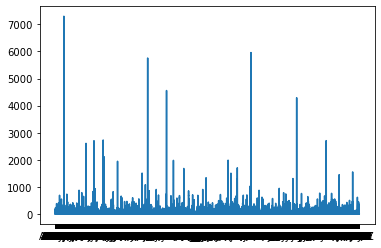

In [21]:
import matplotlib.pyplot as plt
plt.plot(STOCK.index, STOCK['Adj Close'])

In [22]:
# Grouper les données par symbole et calculer la moyenne quotidienne
symbol_date_means = STOCK.groupby(['SYMBOL', 'Date']).mean()

symbol_date_means

Open        High         Low       Close   Adj Close  \
SYMBOL Date                                                                     
A      2021-01-04  118.940002  120.089996  117.110001  118.639999  117.039726   
       2021-01-05  118.480003  120.320000  118.070000  119.610001  117.996643   
       2021-01-06  118.690002  123.879997  118.209999  122.889999  121.232391   
       2021-01-07  124.330002  127.480003  124.110001  126.160004  124.458290   
       2021-01-08  126.489998  127.639999  125.849998  127.059998  125.346153   
...                       ...         ...         ...         ...         ...   
ZYXI   2023-02-22   12.570000   12.760000   12.350000   12.540000   12.540000   
       2023-02-23   12.690000   12.970000   12.490000   12.630000   12.630000   
       2023-02-24   12.540000   12.820000   12.310000   12.820000   12.820000   
       2023-02-27   12.930000   13.070000   12.560000   12.830000   12.830000   
       2023-02-28   12.820000   13.120000   12.700000   12.920000   12.920000   

                      Volume  
SYMBOL Date                   
A      2021-01-04  2030700.0  
       2021-01-05  2344000.0  
       2021-01-06  2428500.0  
       2021-01-07  1775900.0  
       2021-01-08  1577200.0  
...                      ...  
ZYXI   2023-02-22   181200.0  
       2023-02-23   120600.0  
       2023-02-24   151800.0  
       2023-02-27   103200.0  
       2023-02-28   557000.0  

[2956314 rows x 6 columns]

In [23]:
#df_st = symbol_date_means.pivot_table(index='SYMBOL', columns='Date', values=[ 'Adj Close', 'Volume'])
#df_st

In [150]:
df_st.fillna(0)

NameError: name 'df_st' is not defined

In [151]:
if df_st.isna().any().any():
    print("There are NaN values in the dataframe")
else:
    print("There are no NaN values in the dataframe")

NameError: name 'df_st' is not defined

In [152]:
df_st

NameError: name 'df_st' is not defined

In [153]:
df_st = df_st.unstack(level=1)
df_st

NameError: name 'df_st' is not defined

In [154]:
df_st.fillna(0)

NameError: name 'df_st' is not defined

In [155]:
if df_st.isna().any().any():
    print("There are NaN values in the dataframe")
else:
    print("There are no NaN values in the dataframe")

NameError: name 'df_st' is not defined

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [157]:
df_st

NameError: name 'df_st' is not defined

In [158]:
df_st.dropna()

NameError: name 'df_st' is not defined

In [159]:
df_st=df_st.fillna(0)

NameError: name 'df_st' is not defined

In [160]:
df_st

NameError: name 'df_st' is not defined

In [161]:
df_st

NameError: name 'df_st' is not defined

In [162]:
symbol_date_means

Open        High         Low       Close   Adj Close  \
SYMBOL Date                                                                     
A      2021-01-04  118.940002  120.089996  117.110001  118.639999  117.039719   
       2021-01-05  118.480003  120.320000  118.070000  119.610001  117.996643   
       2021-01-06  118.690002  123.879997  118.209999  122.889999  121.232391   
       2021-01-07  124.330002  127.480003  124.110001  126.160004  124.458298   
       2021-01-08  126.489998  127.639999  125.849998  127.059998  125.346146   
...                       ...         ...         ...         ...         ...   
ZYXI   2023-02-22   12.570000   12.760000   12.350000   12.540000   12.540000   
       2023-02-23   12.690000   12.970000   12.490000   12.630000   12.630000   
       2023-02-24   12.540000   12.820000   12.310000   12.820000   12.820000   
       2023-02-27   12.930000   13.070000   12.560000   12.830000   12.830000   
       2023-02-28   12.820000   13.120000   12.700000   12.920000   12.920000   

                      Volume  
SYMBOL Date                   
A      2021-01-04  2030700.0  
       2021-01-05  2344000.0  
       2021-01-06  2428500.0  
       2021-01-07  1775900.0  
       2021-01-08  1577200.0  
...                      ...  
ZYXI   2023-02-22   181200.0  
       2023-02-23   120600.0  
       2023-02-24   151800.0  
       2023-02-27   103200.0  
       2023-02-28   557000.0  

[2959815 rows x 6 columns]

In [24]:
symbol_date_means

Open        High         Low       Close   Adj Close  \
SYMBOL Date                                                                     
A      2021-01-04  118.940002  120.089996  117.110001  118.639999  117.039726   
       2021-01-05  118.480003  120.320000  118.070000  119.610001  117.996643   
       2021-01-06  118.690002  123.879997  118.209999  122.889999  121.232391   
       2021-01-07  124.330002  127.480003  124.110001  126.160004  124.458290   
       2021-01-08  126.489998  127.639999  125.849998  127.059998  125.346153   
...                       ...         ...         ...         ...         ...   
ZYXI   2023-02-22   12.570000   12.760000   12.350000   12.540000   12.540000   
       2023-02-23   12.690000   12.970000   12.490000   12.630000   12.630000   
       2023-02-24   12.540000   12.820000   12.310000   12.820000   12.820000   
       2023-02-27   12.930000   13.070000   12.560000   12.830000   12.830000   
       2023-02-28   12.820000   13.120000   12.700000   12.920000   12.920000   

                      Volume  
SYMBOL Date                   
A      2021-01-04  2030700.0  
       2021-01-05  2344000.0  
       2021-01-06  2428500.0  
       2021-01-07  1775900.0  
       2021-01-08  1577200.0  
...                      ...  
ZYXI   2023-02-22   181200.0  
       2023-02-23   120600.0  
       2023-02-24   151800.0  
       2023-02-27   103200.0  
       2023-02-28   557000.0  

[2956314 rows x 6 columns]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='High'>

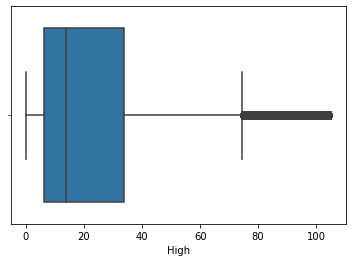

In [28]:
import seaborn as sns
sns.boxplot(symbol_date_means['High'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='High'>

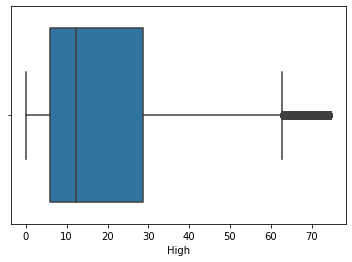

In [29]:
q1=symbol_date_means['High'].quantile(q=0.25)
q3=symbol_date_means['High'].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
symbol_date_means=symbol_date_means[symbol_date_means['High']<borne_sup]
symbol_date_means=symbol_date_means[symbol_date_means['High']>borne_inf]
import seaborn as sns
sns.boxplot(symbol_date_means['High'])


In [30]:
symbol_date_means['RETURN']=(symbol_date_means['Close']-symbol_date_means['Close'].shift(1))/symbol_date_means['Close'].shift(1)*100
symbol_date_means['RISK']=symbol_date_means['RETURN'].rolling(window=30).std()*np.sqrt(30)

In [31]:
import talib

In [32]:
symbol_date_means['RSI3'] = talib.RSI(symbol_date_means['Close'], timeperiod=3)

In [33]:
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3  
SYMBOL Date                                                    
AA     2021-01-04  5400000.0       NaN        NaN         NaN  
       2021-01-05  4297900.0  1.806452        NaN         NaN  
       2021-01-06  5656900.0  6.506122        NaN         NaN  
       2021-01-07  4445500.0  0.079335        NaN  100.000000  
       2021-01-08  2967700.0 -0.951248        NaN   84.615394  
...                      ...       ...        ...         ...  
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  
       2023-02-23   120600.0  0.717705  14.995114   39.651975  
       2023-02-24   151800.0  1.504351  15.164373   62.681162  
       2023-02-27   103200.0  0.078005  14.929660   63.772605  
       2023-02-28   557000.0  0.701482  14.884108   74.027165  

[2493499 rows x 9 columns]

In [34]:
symbol_date_means['RSI7'] = talib.RSI(symbol_date_means['Close'], timeperiod=7)
symbol_date_means['RSI14'] = talib.RSI(symbol_date_means['Close'], timeperiod=14)

In [35]:
# Calculer le ROC pour les périodes 5 et 10
symbol_date_means['ROC5'] = talib.ROC(symbol_date_means['Close'], timeperiod=5)
symbol_date_means['ROC10'] = talib.ROC(symbol_date_means['Close'], timeperiod=10)

In [36]:
# Calculer le Momentum pour les périodes 5 et 10
symbol_date_means['MOM5'] = talib.MOM(symbol_date_means['Close'], timeperiod=5)
symbol_date_means['MOM10'] = talib.MOM(symbol_date_means['Close'], timeperiod=10)

In [37]:
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3       RSI7  \
SYMBOL Date                                                                
AA     2021-01-04  5400000.0       NaN        NaN         NaN        NaN   
       2021-01-05  4297900.0  1.806452        NaN         NaN        NaN   
       2021-01-06  5656900.0  6.506122        NaN         NaN        NaN   
       2021-01-07  4445500.0  0.079335        NaN  100.000000        NaN   
       2021-01-08  2967700.0 -0.951248        NaN   84.615394        NaN   
...                      ...       ...        ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108   74.027165  48.548661   

                       RSI14      ROC5     ROC10      MOM5  MOM10  
SYMBOL Date                                                        
AA     2021-01-04        NaN       NaN       NaN       NaN    NaN  
       2021-01-05        NaN       NaN       NaN       NaN    NaN  
       2021-01-06        NaN       NaN       NaN       NaN    NaN  
       2021-01-07        NaN       NaN       NaN       NaN    NaN  
       2021-01-08        NaN       NaN       NaN       NaN    NaN  
...                      ...       ...       ...       ...    ...  
ZYXI   2023-02-22  33.637279 -1.259841 -2.488334 -0.160000  -0.32  
       2023-02-23  35.481800 -2.621435 -0.079116 -0.340000  -0.01  
       2023-02-24  39.316439 -0.543062  1.907788 -0.070001   0.24  
       2023-02-27  39.520188 -1.685826  1.906273 -0.220000   0.24  
       2023-02-28  41.426282  2.458370  1.333334  0.310000   0.17  

[2493499 rows x 15 columns]

In [38]:
mean = symbol_date_means['RSI3'].mean()
symbol_date_means['RSI3'].fillna(mean, inplace=True)


In [39]:
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3       RSI7  \
SYMBOL Date                                                                
AA     2021-01-04  5400000.0       NaN        NaN   48.958878        NaN   
       2021-01-05  4297900.0  1.806452        NaN   48.958878        NaN   
       2021-01-06  5656900.0  6.506122        NaN   48.958878        NaN   
       2021-01-07  4445500.0  0.079335        NaN  100.000000        NaN   
       2021-01-08  2967700.0 -0.951248        NaN   84.615394        NaN   
...                      ...       ...        ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108   74.027165  48.548661   

                       RSI14      ROC5     ROC10      MOM5  MOM10  
SYMBOL Date                                                        
AA     2021-01-04        NaN       NaN       NaN       NaN    NaN  
       2021-01-05        NaN       NaN       NaN       NaN    NaN  
       2021-01-06        NaN       NaN       NaN       NaN    NaN  
       2021-01-07        NaN       NaN       NaN       NaN    NaN  
       2021-01-08        NaN       NaN       NaN       NaN    NaN  
...                      ...       ...       ...       ...    ...  
ZYXI   2023-02-22  33.637279 -1.259841 -2.488334 -0.160000  -0.32  
       2023-02-23  35.481800 -2.621435 -0.079116 -0.340000  -0.01  
       2023-02-24  39.316439 -0.543062  1.907788 -0.070001   0.24  
       2023-02-27  39.520188 -1.685826  1.906273 -0.220000   0.24  
       2023-02-28  41.426282  2.458370  1.333334  0.310000   0.17  

[2493499 rows x 15 columns]

In [40]:
mean = symbol_date_means['RSI7'].mean()
symbol_date_means['RSI7'].fillna(mean, inplace=True)
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3       RSI7  \
SYMBOL Date                                                                
AA     2021-01-04  5400000.0       NaN        NaN   48.958878  49.131327   
       2021-01-05  4297900.0  1.806452        NaN   48.958878  49.131327   
       2021-01-06  5656900.0  6.506122        NaN   48.958878  49.131327   
       2021-01-07  4445500.0  0.079335        NaN  100.000000  49.131327   
       2021-01-08  2967700.0 -0.951248        NaN   84.615394  49.131327   
...                      ...       ...        ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108   74.027165  48.548661   

                       RSI14      ROC5     ROC10      MOM5  MOM10  
SYMBOL Date                                                        
AA     2021-01-04        NaN       NaN       NaN       NaN    NaN  
       2021-01-05        NaN       NaN       NaN       NaN    NaN  
       2021-01-06        NaN       NaN       NaN       NaN    NaN  
       2021-01-07        NaN       NaN       NaN       NaN    NaN  
       2021-01-08        NaN       NaN       NaN       NaN    NaN  
...                      ...       ...       ...       ...    ...  
ZYXI   2023-02-22  33.637279 -1.259841 -2.488334 -0.160000  -0.32  
       2023-02-23  35.481800 -2.621435 -0.079116 -0.340000  -0.01  
       2023-02-24  39.316439 -0.543062  1.907788 -0.070001   0.24  
       2023-02-27  39.520188 -1.685826  1.906273 -0.220000   0.24  
       2023-02-28  41.426282  2.458370  1.333334  0.310000   0.17  

[2493499 rows x 15 columns]

In [41]:
mean = symbol_date_means['RSI14'].mean()
symbol_date_means['RSI14'].fillna(mean, inplace=True)
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3       RSI7  \
SYMBOL Date                                                                
AA     2021-01-04  5400000.0       NaN        NaN   48.958878  49.131327   
       2021-01-05  4297900.0  1.806452        NaN   48.958878  49.131327   
       2021-01-06  5656900.0  6.506122        NaN   48.958878  49.131327   
       2021-01-07  4445500.0  0.079335        NaN  100.000000  49.131327   
       2021-01-08  2967700.0 -0.951248        NaN   84.615394  49.131327   
...                      ...       ...        ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108   74.027165  48.548661   

                       RSI14      ROC5     ROC10      MOM5  MOM10  
SYMBOL Date                                                        
AA     2021-01-04  49.206222       NaN       NaN       NaN    NaN  
       2021-01-05  49.206222       NaN       NaN       NaN    NaN  
       2021-01-06  49.206222       NaN       NaN       NaN    NaN  
       2021-01-07  49.206222       NaN       NaN       NaN    NaN  
       2021-01-08  49.206222       NaN       NaN       NaN    NaN  
...                      ...       ...       ...       ...    ...  
ZYXI   2023-02-22  33.637279 -1.259841 -2.488334 -0.160000  -0.32  
       2023-02-23  35.481800 -2.621435 -0.079116 -0.340000  -0.01  
       2023-02-24  39.316439 -0.543062  1.907788 -0.070001   0.24  
       2023-02-27  39.520188 -1.685826  1.906273 -0.220000   0.24  
       2023-02-28  41.426282  2.458370  1.333334  0.310000   0.17  

[2493499 rows x 15 columns]

In [42]:
mean = symbol_date_means['ROC5'].mean()
symbol_date_means['ROC5'].fillna(mean, inplace=True)
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3       RSI7  \
SYMBOL Date                                                                
AA     2021-01-04  5400000.0       NaN        NaN   48.958878  49.131327   
       2021-01-05  4297900.0  1.806452        NaN   48.958878  49.131327   
       2021-01-06  5656900.0  6.506122        NaN   48.958878  49.131327   
       2021-01-07  4445500.0  0.079335        NaN  100.000000  49.131327   
       2021-01-08  2967700.0 -0.951248        NaN   84.615394  49.131327   
...                      ...       ...        ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108   74.027165  48.548661   

                       RSI14       ROC5     ROC10      MOM5  MOM10  
SYMBOL Date                                                         
AA     2021-01-04  49.206222  12.756260       NaN       NaN    NaN  
       2021-01-05  49.206222  12.756260       NaN       NaN    NaN  
       2021-01-06  49.206222  12.756260       NaN       NaN    NaN  
       2021-01-07  49.206222  12.756260       NaN       NaN    NaN  
       2021-01-08  49.206222  12.756260       NaN       NaN    NaN  
...                      ...        ...       ...       ...    ...  
ZYXI   2023-02-22  33.637279  -1.259841 -2.488334 -0.160000  -0.32  
       2023-02-23  35.481800  -2.621435 -0.079116 -0.340000  -0.01  
       2023-02-24  39.316439  -0.543062  1.907788 -0.070001   0.24  
       2023-02-27  39.520188  -1.685826  1.906273 -0.220000   0.24  
       2023-02-28  41.426282   2.458370  1.333334  0.310000   0.17  

[2493499 rows x 15 columns]

In [43]:
mean = symbol_date_means['ROC10'].mean()
symbol_date_means['ROC10'].fillna(mean, inplace=True)
symbol_date_means


Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3       RSI7  \
SYMBOL Date                                                                
AA     2021-01-04  5400000.0       NaN        NaN   48.958878  49.131327   
       2021-01-05  4297900.0  1.806452        NaN   48.958878  49.131327   
       2021-01-06  5656900.0  6.506122        NaN   48.958878  49.131327   
       2021-01-07  4445500.0  0.079335        NaN  100.000000  49.131327   
       2021-01-08  2967700.0 -0.951248        NaN   84.615394  49.131327   
...                      ...       ...        ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108   74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5  MOM10  
SYMBOL Date                                                          
AA     2021-01-04  49.206222  12.756260  23.831707       NaN    NaN  
       2021-01-05  49.206222  12.756260  23.831707       NaN    NaN  
       2021-01-06  49.206222  12.756260  23.831707       NaN    NaN  
       2021-01-07  49.206222  12.756260  23.831707       NaN    NaN  
       2021-01-08  49.206222  12.756260  23.831707       NaN    NaN  
...                      ...        ...        ...       ...    ...  
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000  -0.32  
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000  -0.01  
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001   0.24  
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000   0.24  
       2023-02-28  41.426282   2.458370   1.333334  0.310000   0.17  

[2493499 rows x 15 columns]

In [44]:
mean = symbol_date_means['MOM5'].mean()
symbol_date_means['MOM5'].fillna(mean, inplace=True)
symbol_date_means
mean = symbol_date_means['MOM10'].mean()
symbol_date_means['MOM10'].fillna(mean, inplace=True)
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3       RSI7  \
SYMBOL Date                                                                
AA     2021-01-04  5400000.0       NaN        NaN   48.958878  49.131327   
       2021-01-05  4297900.0  1.806452        NaN   48.958878  49.131327   
       2021-01-06  5656900.0  6.506122        NaN   48.958878  49.131327   
       2021-01-07  4445500.0  0.079335        NaN  100.000000  49.131327   
       2021-01-08  2967700.0 -0.951248        NaN   84.615394  49.131327   
...                      ...       ...        ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108   74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  
SYMBOL Date                                                             
AA     2021-01-04  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-05  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-06  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-07  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-08  49.206222  12.756260  23.831707 -0.000024 -0.000047  
...                      ...        ...        ...       ...       ...  
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000  
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000  
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000  
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000  
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000  

[2493499 rows x 15 columns]

In [45]:
print(symbol_date_means.isna())


                    Open   High    Low  Close  Adj Close  Volume  RETURN  \
SYMBOL Date                                                                
AA     2021-01-04  False  False  False  False      False   False    True   
       2021-01-05  False  False  False  False      False   False   False   
       2021-01-06  False  False  False  False      False   False   False   
       2021-01-07  False  False  False  False      False   False   False   
       2021-01-08  False  False  False  False      False   False   False   
...                  ...    ...    ...    ...        ...     ...     ...   
ZYXI   2023-02-22  False  False  False  False      False   False   False   
       2023-02-23  False  False  False  False      False   False   False   
       2023-02-24  False  False  False  False      False   False   False   
       2023-02-27  False  False  False  False      False   False   False   
       2023-02-28  False  False  False  False      False   False   False   

           

In [46]:
symbol_date_means=symbol_date_means.drop_duplicates()

In [47]:
# Check for missing values
if symbol_date_means.isna().sum().sum() == 0:
    print('The data is clean')
else:
    print('The data contains missing values')

The data contains missing values


In [48]:
symbol_date_means.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
RETURN       float64
RISK         float64
RSI3         float64
RSI7         float64
RSI14        float64
ROC5         float64
ROC10        float64
MOM5         float64
MOM10        float64
dtype: object

In [49]:
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3       RSI7  \
SYMBOL Date                                                                
AA     2021-01-04  5400000.0       NaN        NaN   48.958878  49.131327   
       2021-01-05  4297900.0  1.806452        NaN   48.958878  49.131327   
       2021-01-06  5656900.0  6.506122        NaN   48.958878  49.131327   
       2021-01-07  4445500.0  0.079335        NaN  100.000000  49.131327   
       2021-01-08  2967700.0 -0.951248        NaN   84.615394  49.131327   
...                      ...       ...        ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108   74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  
SYMBOL Date                                                             
AA     2021-01-04  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-05  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-06  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-07  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-08  49.206222  12.756260  23.831707 -0.000024 -0.000047  
...                      ...        ...        ...       ...       ...  
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000  
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000  
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000  
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000  
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000  

[2490374 rows x 15 columns]

In [50]:
#symbol_date_means=symbol_date_means.drop(['Close', 'Adj Close','Volume'], axis=1)

In [52]:
mean = symbol_date_means['RETURN'].mean()
symbol_date_means['RETURN'].fillna(mean, inplace=True)
symbol_date_means

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK        RSI3       RSI7  \
SYMBOL Date                                                                
AA     2021-01-04  5400000.0  2.928501        NaN   48.958878  49.131327   
       2021-01-05  4297900.0  1.806452        NaN   48.958878  49.131327   
       2021-01-06  5656900.0  6.506122        NaN   48.958878  49.131327   
       2021-01-07  4445500.0  0.079335        NaN  100.000000  49.131327   
       2021-01-08  2967700.0 -0.951248        NaN   84.615394  49.131327   
...                      ...       ...        ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108   74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  
SYMBOL Date                                                             
AA     2021-01-04  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-05  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-06  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-07  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-08  49.206222  12.756260  23.831707 -0.000024 -0.000047  
...                      ...        ...        ...       ...       ...  
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000  
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000  
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000  
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000  
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000  

[2490374 rows x 15 columns]

In [53]:
mean = symbol_date_means['RISK'].mean()
symbol_date_means['RISK'].fillna(mean, inplace=True)
symbol_date_means

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-01-04  23.620001  24.450001  23.125000  23.250000  22.987356   
       2021-01-05  23.299999  24.120001  23.219999  23.670000  23.402613   
       2021-01-06  24.500000  25.660000  24.400000  25.209999  24.925215   
       2021-01-07  25.629999  26.200001  24.959999  25.230000  24.944988   
       2021-01-08  25.299999  25.469999  24.520000  24.990000  24.707701   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN        RISK        RSI3       RSI7  \
SYMBOL Date                                                                 
AA     2021-01-04  5400000.0  2.928501  109.699192   48.958878  49.131327   
       2021-01-05  4297900.0  1.806452  109.699192   48.958878  49.131327   
       2021-01-06  5656900.0  6.506122  109.699192   48.958878  49.131327   
       2021-01-07  4445500.0  0.079335  109.699192  100.000000  49.131327   
       2021-01-08  2967700.0 -0.951248  109.699192   84.615394  49.131327   
...                      ...       ...         ...         ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113   16.301557   25.045411  28.911599   
       2023-02-23   120600.0  0.717705   14.995114   39.651975  33.770604   
       2023-02-24   151800.0  1.504351   15.164373   62.681162  43.313581   
       2023-02-27   103200.0  0.078005   14.929660   63.772605  43.810735   
       2023-02-28   557000.0  0.701482   14.884108   74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  
SYMBOL Date                                                             
AA     2021-01-04  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-05  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-06  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-07  49.206222  12.756260  23.831707 -0.000024 -0.000047  
       2021-01-08  49.206222  12.756260  23.831707 -0.000024 -0.000047  
...                      ...        ...        ...       ...       ...  
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000  
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000  
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000  
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000  
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000  

[2490374 rows x 15 columns]

In [54]:
# Check for missing values
if symbol_date_means.isna().sum().sum() == 0:
    print('The data is clean')
else:
    print('The data contains missing values')

The data is clean


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RETURN'>

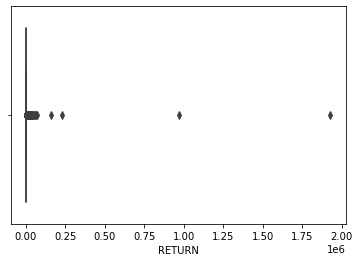

In [55]:
import seaborn as sns
sns.boxplot(symbol_date_means['RETURN'])

In [56]:
q1=symbol_date_means['RETURN'].quantile(q=0.25)
q3=symbol_date_means['RETURN'].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RETURN'>

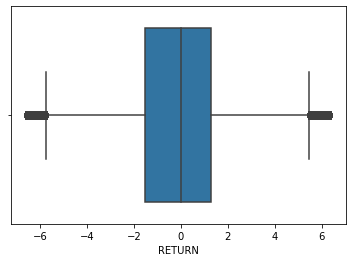

In [57]:

symbol_date_means=symbol_date_means[symbol_date_means['RETURN']<borne_sup]
symbol_date_means=symbol_date_means[symbol_date_means['RETURN']>borne_inf]
import seaborn as sns
sns.boxplot(symbol_date_means['RETURN'])

#import pandas_datareader.data as web
#import datetime


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RISK'>

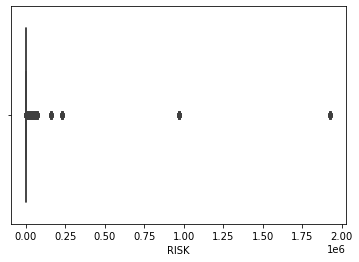

In [58]:
import seaborn as sns
sns.boxplot(symbol_date_means['RISK'])

In [59]:
q1=symbol_date_means['RISK'].quantile(q=0.25)
q3=symbol_date_means['RISK'].quantile(q=0.75)

In [60]:
#On calcule l'écart interquartile (IQR)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RISK'>

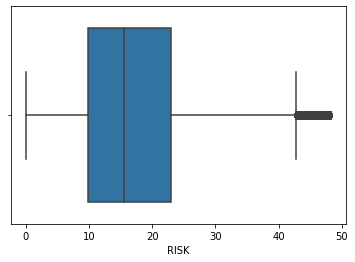

In [61]:
symbol_date_means=symbol_date_means[symbol_date_means['RISK']<borne_sup]
symbol_date_means=symbol_date_means[symbol_date_means['RISK']>borne_inf]
import seaborn as sns
sns.boxplot(symbol_date_means['RISK'])

#import pandas_datareader.data as web
#import datetime

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RSI3'>

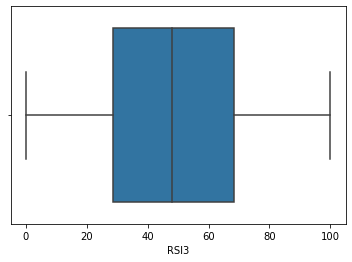

In [62]:
import seaborn as sns
sns.boxplot(symbol_date_means['RSI3'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RSI7'>

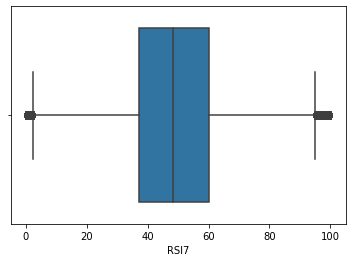

In [63]:
import seaborn as sns
sns.boxplot(symbol_date_means['RSI7'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RSI14'>

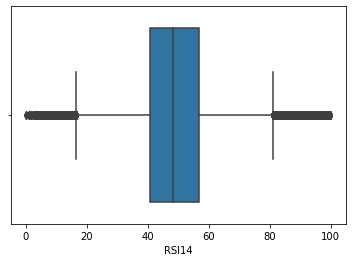

In [64]:
import seaborn as sns
sns.boxplot(symbol_date_means['RSI14'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROC5'>

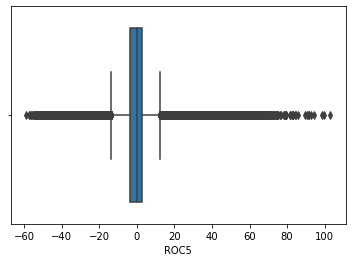

In [65]:
import seaborn as sns
sns.boxplot(symbol_date_means['ROC5'])  

In [66]:
q1=symbol_date_means['ROC5'].quantile(q=0.25)
q3=symbol_date_means['ROC5'].quantile(q=0.75)

In [67]:
#On calcule l'écart interquartile (IQR)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROC5'>

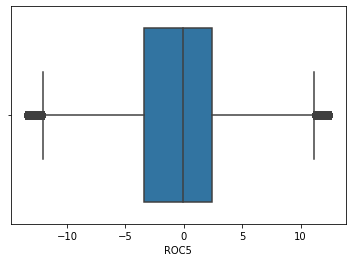

In [68]:
symbol_date_means=symbol_date_means[symbol_date_means['ROC5']<borne_sup]
symbol_date_means=symbol_date_means[symbol_date_means['ROC5']>borne_inf]
import seaborn as sns
sns.boxplot(symbol_date_means['ROC5'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROC10'>

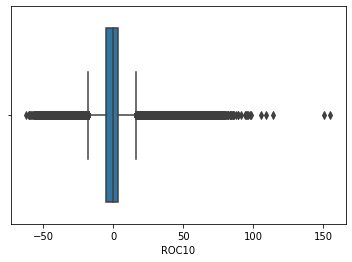

In [69]:
import seaborn as sns
sns.boxplot(symbol_date_means['ROC10'])

In [70]:
q1=symbol_date_means['ROC10'].quantile(q=0.25)
q3=symbol_date_means['ROC10'].quantile(q=0.75)

In [71]:
#On calcule l'écart interquartile (IQR)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROC10'>

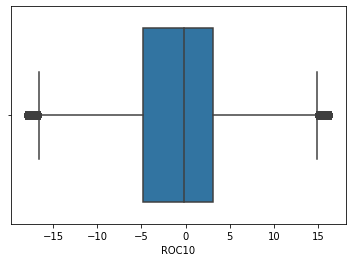

In [72]:
symbol_date_means=symbol_date_means[symbol_date_means['ROC10']<borne_sup]
symbol_date_means=symbol_date_means[symbol_date_means['ROC10']>borne_inf]
import seaborn as sns
sns.boxplot(symbol_date_means['ROC10'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MOM5'>

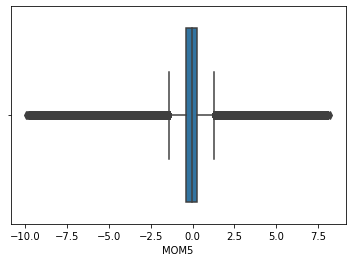

In [73]:
import seaborn as sns
sns.boxplot(symbol_date_means['MOM5'])

In [74]:
q1=symbol_date_means['MOM5'].quantile(q=0.25)
q3=symbol_date_means['MOM5'].quantile(q=0.75)

In [75]:
#On calcule l'écart interquartile (IQR)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MOM5'>

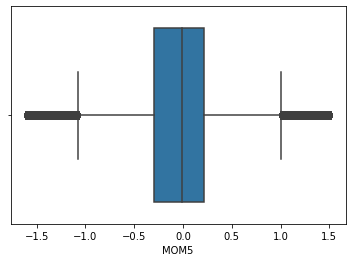

In [218]:
symbol_date_means=symbol_date_means[symbol_date_means['MOM5']<borne_sup]
symbol_date_means=symbol_date_means[symbol_date_means['MOM5']>borne_inf]
import seaborn as sns
sns.boxplot(symbol_date_means['MOM5'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MOM10'>

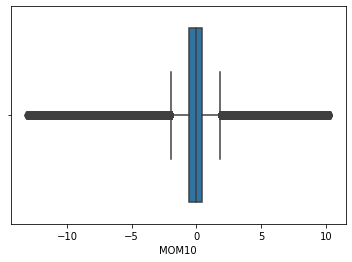

In [76]:
import seaborn as sns
sns.boxplot(symbol_date_means['MOM10']) 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

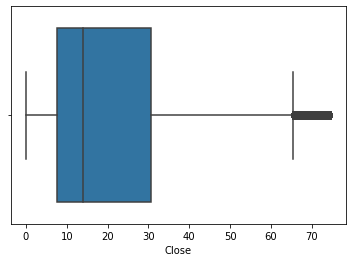

In [77]:
import seaborn as sns
sns.boxplot(symbol_date_means['Close']) 

In [228]:
#today = datetime.datetime.now().strftime("%Y-%m-%d")

In [78]:
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-02-17  22.410000  22.674999  21.709999  21.930000  21.682268   
       2021-02-18  22.030001  22.260000  21.070000  21.120001  20.881418   
       2021-02-23  23.860001  25.090000  22.950001  24.900000  24.618717   
       2021-02-26  24.200001  24.980000  23.639999  24.549999  24.272671   
       2021-03-08  29.650000  30.170000  28.400000  28.469999  28.148386   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK       RSI3       RSI7  \
SYMBOL Date                                                               
AA     2021-02-17  4239500.0 -2.229157  20.330917  56.822763  61.733174   
       2021-02-18  3545600.0 -3.693568  20.533086  30.429750  48.033464   
       2021-02-23  6009800.0  0.403227  22.966587  86.297248  77.491278   
       2021-02-26  6412700.0 -3.951488  25.588382  43.378719  57.462421   
       2021-03-08  4985700.0 -1.793724  25.417598  52.504628  62.147044   
...                      ...       ...        ...        ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557  25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114  39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373  62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660  63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108  74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  
SYMBOL Date                                                             
AA     2021-02-17  53.402184   0.781250  14.756670  0.170000  2.820000  
       2021-02-18  47.835020  -2.040810   6.130660 -0.439999  1.220001  
       2021-02-23  66.213113  11.012034  14.220186  2.469999  3.100000  
       2021-02-26  57.962874   6.139214  14.773258  1.420000  3.160000  
       2021-03-08  62.796338   9.542130  14.798388  2.480000  3.670000  
...                      ...        ...        ...       ...       ...  
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000  
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000  
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000  
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000  
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000  

[1837236 rows x 15 columns]

In [92]:
symbol_date_means

Open       High     Low      Close  Adj Close  \
SYMBOL Date                                                             
AA     2021-02-18  22.030001  22.260000  21.070  21.120001  20.881418   
       2021-03-29  32.450001  33.990002  31.855  32.040001  31.678062   
       2021-04-05  32.680000  32.799999  31.510  31.549999  31.193594   
       2021-04-06  31.660000  33.070000  31.100  31.309999  30.956306   
       2021-04-12  31.500000  31.879999  31.100  31.770000  31.411112   
...                      ...        ...     ...        ...        ...   
SGRP   2023-02-22   1.270000   1.340000   1.250   1.320000   1.320000   
       2023-02-23   1.330000   1.330000   1.300   1.300000   1.300000   
       2023-02-24   1.300000   1.310000   1.300   1.310000   1.310000   
       2023-02-27   1.260000   1.300000   1.250   1.270000   1.270000   
       2023-02-28   1.300000   1.310000   1.300   1.300000   1.300000   

                      Volume    RETURN       RISK       RSI3       RSI7  \
SYMBOL Date                                                               
AA     2021-02-18  3545600.0 -3.693568  20.533086  30.422202  37.197544   
       2021-03-29  8276200.0 -2.257468  31.178186  66.164040  60.238927   
       2021-04-05  3933800.0 -2.109837  29.762901  38.748268  52.873111   
       2021-04-06  6204500.0 -0.760697  29.151391  33.371062  50.868822   
       2021-04-12  4418500.0  1.307397  26.578963  64.779581  55.785583   
...                      ...       ...        ...        ...        ...   
SGRP   2023-02-22    12100.0  0.763367   8.006912  47.016228  50.552077   
       2023-02-23     3300.0 -1.515159   8.160775  27.762451  40.664695   
       2023-02-24     2800.0  0.769230   8.195909  44.735895  46.741125   
       2023-02-27    11300.0 -3.053432   8.135665  18.564135  31.626598   
       2023-02-28     6400.0  2.362203   8.476848  50.887715  46.705936   

                       RSI14      ROC5     ROC10      MOM5     MOM10  
SYMBOL Date                                                           
AA     2021-02-18  18.971306 -2.040810  6.130660 -0.439999  1.220001  
       2021-03-29  54.681849  5.290833  3.221649  1.610001  1.000000  
       2021-04-05  52.301809 -3.752287  1.316634 -1.230000  0.410000  
       2021-04-06  51.495214 -2.278406  2.891880 -0.730001  0.879999  
       2021-04-12  53.173602  0.697310 -3.081142  0.220001 -1.009998  
...                      ...       ...       ...       ...       ...  
SGRP   2023-02-22  51.409107  0.000000  1.538469  0.000000  0.020000  
       2023-02-23  46.880645 -0.763358  0.775193 -0.010000  0.010000  
       2023-02-24  49.286061 -2.238813 -0.757584 -0.030000 -0.010000  
       2023-02-27  41.241281 -5.223884 -3.787884 -0.070000 -0.050000  
       2023-02-28  48.085511 -0.763358 -1.515159 -0.010000 -0.020000  

[747272 rows x 15 columns]

In [130]:
#symbols = symbol_date_means.index.unique() # Liste unique des symboles dans l'index du DataFrame


In [ ]:
#data = {} # Dictionnaire pour stocker les données pour chaque symbole

#for symbol in symbols:
    #try:
        #symbol_date_means = web.DataReader(symbol, 'yahoo', today, today) # Récupérer les données financières pour chaque symbole
        #data[symbol] = symbol_date_means # Ajouter les données pour chaque symbole au dictionnaire
    #except:
        #pass # Ignorer les symboles pour lesquels les données ne peuvent pas être récupérées


In [79]:
willr = talib.WILLR(symbol_date_means['High'], symbol_date_means['Low'], symbol_date_means['Close'], timeperiod=14)

In [80]:
symbol_date_means['Williams %R'] = willr

In [81]:
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-02-17  22.410000  22.674999  21.709999  21.930000  21.682268   
       2021-02-18  22.030001  22.260000  21.070000  21.120001  20.881418   
       2021-02-23  23.860001  25.090000  22.950001  24.900000  24.618717   
       2021-02-26  24.200001  24.980000  23.639999  24.549999  24.272671   
       2021-03-08  29.650000  30.170000  28.400000  28.469999  28.148386   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK       RSI3       RSI7  \
SYMBOL Date                                                               
AA     2021-02-17  4239500.0 -2.229157  20.330917  56.822763  61.733174   
       2021-02-18  3545600.0 -3.693568  20.533086  30.429750  48.033464   
       2021-02-23  6009800.0  0.403227  22.966587  86.297248  77.491278   
       2021-02-26  6412700.0 -3.951488  25.588382  43.378719  57.462421   
       2021-03-08  4985700.0 -1.793724  25.417598  52.504628  62.147044   
...                      ...       ...        ...        ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557  25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114  39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373  62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660  63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108  74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  \
SYMBOL Date                                                              
AA     2021-02-17  53.402184   0.781250  14.756670  0.170000  2.820000   
       2021-02-18  47.835020  -2.040810   6.130660 -0.439999  1.220001   
       2021-02-23  66.213113  11.012034  14.220186  2.469999  3.100000   
       2021-02-26  57.962874   6.139214  14.773258  1.420000  3.160000   
       2021-03-08  62.796338   9.542130  14.798388  2.480000  3.670000   
...                      ...        ...        ...       ...       ...   
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000   
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000   
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000   
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000   
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000   

                   Williams %R  
SYMBOL Date                     
AA     2021-02-17          NaN  
       2021-02-18          NaN  
       2021-02-23          NaN  
       2021-02-26          NaN  
       2021-03-08          NaN  
...                        ...  
ZYXI   2023-02-22   -85.657380  
       2023-02-23   -82.071716  
       2023-02-24   -74.502009  
       2023-02-27   -74.103593  
       2023-02-28   -58.426973  

[1837236 rows x 16 columns]

In [91]:
mean = symbol_date_means['Williams %R'].mean()
symbol_date_means['Williams %R'].fillna(mean, inplace=True)
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-02-17  22.410000  22.674999  21.709999  21.930000  21.682268   
       2021-02-18  22.030001  22.260000  21.070000  21.120001  20.881418   
       2021-02-23  23.860001  25.090000  22.950001  24.900000  24.618717   
       2021-02-26  24.200001  24.980000  23.639999  24.549999  24.272671   
       2021-03-08  29.650000  30.170000  28.400000  28.469999  28.148386   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK       RSI3       RSI7  \
SYMBOL Date                                                               
AA     2021-02-17  4239500.0 -2.229157  20.330917  56.822763  61.733174   
       2021-02-18  3545600.0 -3.693568  20.533086  30.429750  48.033464   
       2021-02-23  6009800.0  0.403227  22.966587  86.297248  77.491278   
       2021-02-26  6412700.0 -3.951488  25.588382  43.378719  57.462421   
       2021-03-08  4985700.0 -1.793724  25.417598  52.504628  62.147044   
...                      ...       ...        ...        ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557  25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114  39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373  62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660  63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108  74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  \
SYMBOL Date                                                              
AA     2021-02-17  53.402184   0.781250  14.756670  0.170000  2.820000   
       2021-02-18  47.835020  -2.040810   6.130660 -0.439999  1.220001   
       2021-02-23  66.213113  11.012034  14.220186  2.469999  3.100000   
       2021-02-26  57.962874   6.139214  14.773258  1.420000  3.160000   
       2021-03-08  62.796338   9.542130  14.798388  2.480000  3.670000   
...                      ...        ...        ...       ...       ...   
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000   
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000   
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000   
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000   
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000   

                   Williams %R        ADX        EMA  
SYMBOL Date                                           
AA     2021-02-17   -52.530542  26.724294  21.930000  
       2021-02-18   -52.530542  26.724294  21.852857  
       2021-02-23   -52.530542  26.724294  22.143062  
       2021-02-26   -52.530542  26.724294  22.372294  
       2021-03-08   -52.530542  26.724294  22.953028  
...                        ...        ...        ...  
ZYXI   2023-02-22   -85.657380  23.280447  13.382978  
       2023-02-23   -82.071716  22.323043  13.311266  
       2023-02-24   -74.502009  21.763113  13.264479  
       2023-02-27   -74.103593  20.662313  13.223100  
       2023-02-28   -58.426973  19.525670  13.194233  

[1837236 rows x 18 columns]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Williams %R'>

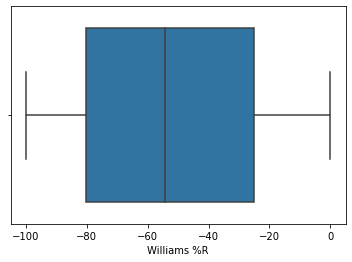

In [92]:
import seaborn as sns
sns.boxplot(symbol_date_means['Williams %R']) 

In [93]:
adx = talib.ADX(symbol_date_means['High'], symbol_date_means['Low'], symbol_date_means['Close'], timeperiod=14)


In [94]:
symbol_date_means['ADX'] = adx

In [95]:
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-02-17  22.410000  22.674999  21.709999  21.930000  21.682268   
       2021-02-18  22.030001  22.260000  21.070000  21.120001  20.881418   
       2021-02-23  23.860001  25.090000  22.950001  24.900000  24.618717   
       2021-02-26  24.200001  24.980000  23.639999  24.549999  24.272671   
       2021-03-08  29.650000  30.170000  28.400000  28.469999  28.148386   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK       RSI3       RSI7  \
SYMBOL Date                                                               
AA     2021-02-17  4239500.0 -2.229157  20.330917  56.822763  61.733174   
       2021-02-18  3545600.0 -3.693568  20.533086  30.429750  48.033464   
       2021-02-23  6009800.0  0.403227  22.966587  86.297248  77.491278   
       2021-02-26  6412700.0 -3.951488  25.588382  43.378719  57.462421   
       2021-03-08  4985700.0 -1.793724  25.417598  52.504628  62.147044   
...                      ...       ...        ...        ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557  25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114  39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373  62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660  63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108  74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  \
SYMBOL Date                                                              
AA     2021-02-17  53.402184   0.781250  14.756670  0.170000  2.820000   
       2021-02-18  47.835020  -2.040810   6.130660 -0.439999  1.220001   
       2021-02-23  66.213113  11.012034  14.220186  2.469999  3.100000   
       2021-02-26  57.962874   6.139214  14.773258  1.420000  3.160000   
       2021-03-08  62.796338   9.542130  14.798388  2.480000  3.670000   
...                      ...        ...        ...       ...       ...   
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000   
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000   
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000   
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000   
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000   

                   Williams %R        ADX        EMA  
SYMBOL Date                                           
AA     2021-02-17   -52.530542        NaN  21.930000  
       2021-02-18   -52.530542        NaN  21.852857  
       2021-02-23   -52.530542        NaN  22.143062  
       2021-02-26   -52.530542        NaN  22.372294  
       2021-03-08   -52.530542        NaN  22.953028  
...                        ...        ...        ...  
ZYXI   2023-02-22   -85.657380  23.280447  13.382978  
       2023-02-23   -82.071716  22.323043  13.311266  
       2023-02-24   -74.502009  21.763113  13.264479  
       2023-02-27   -74.103593  20.662313  13.223100  
       2023-02-28   -58.426973  19.525670  13.194233  

[1837236 rows x 18 columns]

In [96]:
mean = symbol_date_means['ADX'].mean()
symbol_date_means['ADX'].fillna(mean, inplace=True)
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-02-17  22.410000  22.674999  21.709999  21.930000  21.682268   
       2021-02-18  22.030001  22.260000  21.070000  21.120001  20.881418   
       2021-02-23  23.860001  25.090000  22.950001  24.900000  24.618717   
       2021-02-26  24.200001  24.980000  23.639999  24.549999  24.272671   
       2021-03-08  29.650000  30.170000  28.400000  28.469999  28.148386   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK       RSI3       RSI7  \
SYMBOL Date                                                               
AA     2021-02-17  4239500.0 -2.229157  20.330917  56.822763  61.733174   
       2021-02-18  3545600.0 -3.693568  20.533086  30.429750  48.033464   
       2021-02-23  6009800.0  0.403227  22.966587  86.297248  77.491278   
       2021-02-26  6412700.0 -3.951488  25.588382  43.378719  57.462421   
       2021-03-08  4985700.0 -1.793724  25.417598  52.504628  62.147044   
...                      ...       ...        ...        ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557  25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114  39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373  62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660  63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108  74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  \
SYMBOL Date                                                              
AA     2021-02-17  53.402184   0.781250  14.756670  0.170000  2.820000   
       2021-02-18  47.835020  -2.040810   6.130660 -0.439999  1.220001   
       2021-02-23  66.213113  11.012034  14.220186  2.469999  3.100000   
       2021-02-26  57.962874   6.139214  14.773258  1.420000  3.160000   
       2021-03-08  62.796338   9.542130  14.798388  2.480000  3.670000   
...                      ...        ...        ...       ...       ...   
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000   
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000   
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000   
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000   
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000   

                   Williams %R        ADX        EMA  
SYMBOL Date                                           
AA     2021-02-17   -52.530542  26.724294  21.930000  
       2021-02-18   -52.530542  26.724294  21.852857  
       2021-02-23   -52.530542  26.724294  22.143062  
       2021-02-26   -52.530542  26.724294  22.372294  
       2021-03-08   -52.530542  26.724294  22.953028  
...                        ...        ...        ...  
ZYXI   2023-02-22   -85.657380  23.280447  13.382978  
       2023-02-23   -82.071716  22.323043  13.311266  
       2023-02-24   -74.502009  21.763113  13.264479  
       2023-02-27   -74.103593  20.662313  13.223100  
       2023-02-28   -58.426973  19.525670  13.194233  

[1837236 rows x 18 columns]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ADX'>

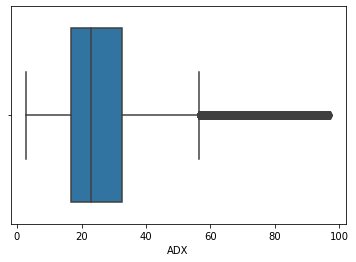

In [97]:
import seaborn as sns
sns.boxplot(symbol_date_means['ADX']) 

In [98]:
# Set the lookback period
lookback_period = 20

# Calculate the EMA using the Pandas ewm function
ema = symbol_date_means['Close'].ewm(span=lookback_period, adjust=False).mean()

In [99]:
symbol_date_means['EMA'] = ema

In [100]:
symbol_date_means

Open       High        Low      Close  Adj Close  \
SYMBOL Date                                                                
AA     2021-02-17  22.410000  22.674999  21.709999  21.930000  21.682268   
       2021-02-18  22.030001  22.260000  21.070000  21.120001  20.881418   
       2021-02-23  23.860001  25.090000  22.950001  24.900000  24.618717   
       2021-02-26  24.200001  24.980000  23.639999  24.549999  24.272671   
       2021-03-08  29.650000  30.170000  28.400000  28.469999  28.148386   
...                      ...        ...        ...        ...        ...   
ZYXI   2023-02-22  12.570000  12.760000  12.350000  12.540000  12.540000   
       2023-02-23  12.690000  12.970000  12.490000  12.630000  12.630000   
       2023-02-24  12.540000  12.820000  12.310000  12.820000  12.820000   
       2023-02-27  12.930000  13.070000  12.560000  12.830000  12.830000   
       2023-02-28  12.820000  13.120000  12.700000  12.920000  12.920000   

                      Volume    RETURN       RISK       RSI3       RSI7  \
SYMBOL Date                                                               
AA     2021-02-17  4239500.0 -2.229157  20.330917  56.822763  61.733174   
       2021-02-18  3545600.0 -3.693568  20.533086  30.429750  48.033464   
       2021-02-23  6009800.0  0.403227  22.966587  86.297248  77.491278   
       2021-02-26  6412700.0 -3.951488  25.588382  43.378719  57.462421   
       2021-03-08  4985700.0 -1.793724  25.417598  52.504628  62.147044   
...                      ...       ...        ...        ...        ...   
ZYXI   2023-02-22   181200.0 -0.555113  16.301557  25.045411  28.911599   
       2023-02-23   120600.0  0.717705  14.995114  39.651975  33.770604   
       2023-02-24   151800.0  1.504351  15.164373  62.681162  43.313581   
       2023-02-27   103200.0  0.078005  14.929660  63.772605  43.810735   
       2023-02-28   557000.0  0.701482  14.884108  74.027165  48.548661   

                       RSI14       ROC5      ROC10      MOM5     MOM10  \
SYMBOL Date                                                              
AA     2021-02-17  53.402184   0.781250  14.756670  0.170000  2.820000   
       2021-02-18  47.835020  -2.040810   6.130660 -0.439999  1.220001   
       2021-02-23  66.213113  11.012034  14.220186  2.469999  3.100000   
       2021-02-26  57.962874   6.139214  14.773258  1.420000  3.160000   
       2021-03-08  62.796338   9.542130  14.798388  2.480000  3.670000   
...                      ...        ...        ...       ...       ...   
ZYXI   2023-02-22  33.637279  -1.259841  -2.488334 -0.160000 -0.320000   
       2023-02-23  35.481800  -2.621435  -0.079116 -0.340000 -0.010000   
       2023-02-24  39.316439  -0.543062   1.907788 -0.070001  0.240000   
       2023-02-27  39.520188  -1.685826   1.906273 -0.220000  0.240000   
       2023-02-28  41.426282   2.458370   1.333334  0.310000  0.170000   

                   Williams %R        ADX        EMA  
SYMBOL Date                                           
AA     2021-02-17   -52.530542  26.724294  21.930000  
       2021-02-18   -52.530542  26.724294  21.852857  
       2021-02-23   -52.530542  26.724294  22.143062  
       2021-02-26   -52.530542  26.724294  22.372294  
       2021-03-08   -52.530542  26.724294  22.953028  
...                        ...        ...        ...  
ZYXI   2023-02-22   -85.657380  23.280447  13.382978  
       2023-02-23   -82.071716  22.323043  13.311266  
       2023-02-24   -74.502009  21.763113  13.264479  
       2023-02-27   -74.103593  20.662313  13.223100  
       2023-02-28   -58.426973  19.525670  13.194233  

[1837236 rows x 18 columns]

In [105]:
symbol_date_means=symbol_date_means.drop(['Adj Close','Volume'], axis=1)

In [106]:
symbol_date_means

RETURN       RISK       RSI3       RSI7      RSI14  \
SYMBOL Date                                                               
AA     2021-02-17 -2.229157  20.330917  56.822763  61.733174  53.402184   
       2021-02-18 -3.693568  20.533086  30.429750  48.033464  47.835020   
       2021-02-23  0.403227  22.966587  86.297248  77.491278  66.213113   
       2021-02-26 -3.951488  25.588382  43.378719  57.462421  57.962874   
       2021-03-08 -1.793724  25.417598  52.504628  62.147044  62.796338   
...                     ...        ...        ...        ...        ...   
ZYXI   2023-02-22 -0.555113  16.301557  25.045411  28.911599  33.637279   
       2023-02-23  0.717705  14.995114  39.651975  33.770604  35.481800   
       2023-02-24  1.504351  15.164373  62.681162  43.313581  39.316439   
       2023-02-27  0.078005  14.929660  63.772605  43.810735  39.520188   
       2023-02-28  0.701482  14.884108  74.027165  48.548661  41.426282   

                        ROC5      ROC10      MOM5     MOM10  Williams %R  \
SYMBOL Date                                                                
AA     2021-02-17   0.781250  14.756670  0.170000  2.820000   -52.530542   
       2021-02-18  -2.040810   6.130660 -0.439999  1.220001   -52.530542   
       2021-02-23  11.012034  14.220186  2.469999  3.100000   -52.530542   
       2021-02-26   6.139214  14.773258  1.420000  3.160000   -52.530542   
       2021-03-08   9.542130  14.798388  2.480000  3.670000   -52.530542   
...                      ...        ...       ...       ...          ...   
ZYXI   2023-02-22  -1.259841  -2.488334 -0.160000 -0.320000   -85.657380   
       2023-02-23  -2.621435  -0.079116 -0.340000 -0.010000   -82.071716   
       2023-02-24  -0.543062   1.907788 -0.070001  0.240000   -74.502009   
       2023-02-27  -1.685826   1.906273 -0.220000  0.240000   -74.103593   
       2023-02-28   2.458370   1.333334  0.310000  0.170000   -58.426973   

                         ADX        EMA  
SYMBOL Date                              
AA     2021-02-17  26.724294  21.930000  
       2021-02-18  26.724294  21.852857  
       2021-02-23  26.724294  22.143062  
       2021-02-26  26.724294  22.372294  
       2021-03-08  26.724294  22.953028  
...                      ...        ...  
ZYXI   2023-02-22  23.280447  13.382978  
       2023-02-23  22.323043  13.311266  
       2023-02-24  21.763113  13.264479  
       2023-02-27  20.662313  13.223100  
       2023-02-28  19.525670  13.194233  

[1837236 rows x 12 columns]

<AxesSubplot:>

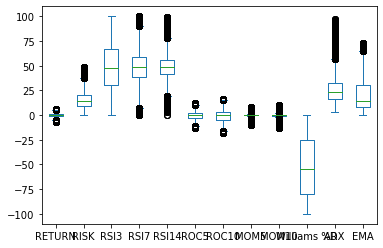

In [107]:
symbol_date_means.plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x27ded18cf10>,
 'caps': [<matplotlib.lines.Line2D at 0x27ded19b670>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ded18cb80>],
 'medians': [<matplotlib.lines.Line2D at 0x27ded19bd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ded1a8160>],
 'means': []}

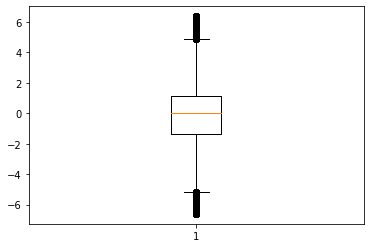

In [108]:
plt.boxplot(symbol_date_means['RETURN'])

In [109]:
# check for missing values
if symbol_date_means.isnull().sum().sum() == 0:
    print('Data is cleaned - no missing values.')
else:
    print('Data is not cleaned - contains missing values.')

Data is cleaned - no missing values.


In [110]:
symbol_date_means.shape

(1837236, 12)

In [240]:
DF

Open  High    Low  Close  Adj Close    Volume    RETURN  \
SYMBOL Date                                                                  
AACG   2021-12-08  1.50  1.58  1.400  1.420      1.420   79800.0 -7.189544   
       2021-12-13  1.57  1.57  1.400  1.420      1.420   23000.0 -9.554146   
       2021-12-14  1.42  1.49  1.350  1.420      1.420   10700.0  0.000000   
       2021-12-15  1.31  1.40  1.100  1.340      1.340   53100.0 -5.633798   
       2021-12-22  1.18  1.30  1.180  1.220      1.220   33300.0  2.521006   
...                 ...   ...    ...    ...        ...       ...       ...   
ZYNE   2023-02-17  0.55  0.56  0.518  0.518      0.518  219900.0 -7.001791   
       2023-02-21  0.55  0.55  0.500  0.500      0.500  414000.0 -3.474905   
       2023-02-22  0.50  0.53  0.492  0.530      0.530  263300.0  5.999994   
       2023-02-24  0.50  0.52  0.481  0.520      0.520  213500.0  4.208410   
       2023-02-27  0.52  0.52  0.496  0.519      0.519   98800.0 -0.192305   

                        RISK       RSI3       RSI7      RSI14       ROC5  \
SYMBOL Date                                                                
AACG   2021-12-08  23.485618  39.379050  30.992053  27.926548  -5.333336   
       2021-12-13  27.647622  33.375079  35.670647  32.682445   2.158271   
       2021-12-14  27.585495  33.375079  35.670647  32.682445  -7.189544   
       2021-12-15  27.400537  21.132461  30.427026  30.095202  -5.633798   
       2021-12-22  29.040001  40.342043  31.682248  30.053783  -8.955224   
...                      ...        ...        ...        ...        ...   
ZYNE   2023-02-17  24.580610  19.093979  30.178872  38.758008 -10.535404   
       2023-02-21  24.813997  14.122764  26.878272  36.616999 -13.793101   
       2023-02-22  25.566407  47.981151  39.701355  42.334497  -7.017548   
       2023-02-24  26.318730  49.316322  40.921224  42.311756  -6.642729   
       2023-02-27  26.157530  48.355436  40.647516  42.176795   0.193048   

                       ROC10   MOM5  MOM10  
SYMBOL Date                                 
AACG   2021-12-08 -17.919079 -0.080 -0.310  
       2021-12-13 -16.470593  0.030 -0.280  
       2021-12-14 -13.414636 -0.110 -0.220  
       2021-12-15 -10.666664 -0.080 -0.160  
       2021-12-22 -14.084502 -0.120 -0.200  
...                      ...    ...    ...  
ZYNE   2023-02-17 -17.777776 -0.061 -0.112  
       2023-02-21 -18.032789 -0.080 -0.110  
       2023-02-22 -15.335466 -0.040 -0.096  
       2023-02-24  -5.797103 -0.037 -0.032  
       2023-02-27 -10.362695  0.001 -0.060  

[91707 rows x 15 columns]

In [111]:
#Get all the symbols
symbols = symbol_date_means.index.get_level_values('SYMBOL').unique()


In [119]:
# Create an empty DataFrame to store the stock data
df = pd.DataFrame()

In [120]:
# Loop through each symbol and download the latest stock data
for symbol in symbols:
    stock_data = yf.download(symbol, period='1d')
    stock_data['SYMBOL'] = symbol
    df = pd.concat([df, stock_data])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [121]:
df

,Open,High,Low,Close,Adj Close,Volume,SYMBOL
Date,,,,,,,
2023-04-11,40.5200,41.174999,40.150002,40.630001,40.630001,4280049.0,AA
2023-04-11,10.3500,10.355000,10.340000,10.340000,10.340000,192818.0,AAC
2023-04-11,1.8991,1.970000,1.850000,1.970000,1.970000,8649.0,AACG
2023-04-11,10.1000,10.100000,10.100000,10.100000,10.100000,9118.0,AACI
2023-04-11,7.2100,7.730000,7.210000,7.670000,7.670000,122626.0,AADI
...,...,...,...,...,...,...,...
2023-04-11,3.9200,4.020000,3.820000,3.820000,3.820000,85213.0,ZVIA
2023-04-11,20.5800,21.020000,20.504999,20.809999,20.809999,1168308.0,ZWS
2023-04-11,9.3400,9.530000,8.726100,9.000000,9.000000,1026889.0,ZYME


In [122]:
#remove the NaN
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,SYMBOL
Date,,,,,,,
2023-04-11,40.5200,41.174999,40.150002,40.630001,40.630001,4280049.0,AA
2023-04-11,10.3500,10.355000,10.340000,10.340000,10.340000,192818.0,AAC
2023-04-11,1.8991,1.970000,1.850000,1.970000,1.970000,8649.0,AACG
2023-04-11,10.1000,10.100000,10.100000,10.100000,10.100000,9118.0,AACI
2023-04-11,7.2100,7.730000,7.210000,7.670000,7.670000,122626.0,AADI
...,...,...,...,...,...,...,...
2023-04-11,3.9200,4.020000,3.820000,3.820000,3.820000,85213.0,ZVIA
2023-04-11,20.5800,21.020000,20.504999,20.809999,20.809999,1168308.0,ZWS
2023-04-11,9.3400,9.530000,8.726100,9.000000,9.000000,1026889.0,ZYME


In [123]:
df.isnull()

,Open,High,Low,Close,Adj Close,Volume,SYMBOL
Date,,,,,,,
2023-04-11,False,False,False,False,False,False,False
2023-04-11,False,False,False,False,False,False,False
2023-04-11,False,False,False,False,False,False,False
2023-04-11,False,False,False,False,False,False,False
2023-04-11,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2023-04-11,False,False,False,False,False,False,False
2023-04-11,False,False,False,False,False,False,False
2023-04-11,False,False,False,False,False,False,False


In [124]:
df=df.drop_duplicates()

In [125]:
if df.isna().any().any():
    print("There are NaN values in the dataframe")
else:
    print("There are no NaN values in the dataframe")

There are no NaN values in the dataframe


In [131]:
df = df.set_index('SYMBOL')


KeyError: "None of ['SYMBOL'] are in the columns"

In [132]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
SYMBOL,,,,,,,,
AA,0,2023-04-11,40.5200,41.174999,40.150002,40.630001,40.630001,4280049.0
AAC,1,2023-04-11,10.3500,10.355000,10.340000,10.340000,10.340000,192818.0
AACG,2,2023-04-11,1.8991,1.970000,1.850000,1.970000,1.970000,8649.0
AACI,3,2023-04-11,10.1000,10.100000,10.100000,10.100000,10.100000,9118.0
AADI,4,2023-04-11,7.2100,7.730000,7.210000,7.670000,7.670000,122626.0
...,...,...,...,...,...,...,...,...
ZVIA,5000,2023-04-11,3.9200,4.020000,3.820000,3.820000,3.820000,85213.0
ZWS,5001,2023-04-11,20.5800,21.020000,20.504999,20.809999,20.809999,1168308.0
ZYME,5002,2023-04-11,9.3400,9.530000,8.726100,9.000000,9.000000,1026889.0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

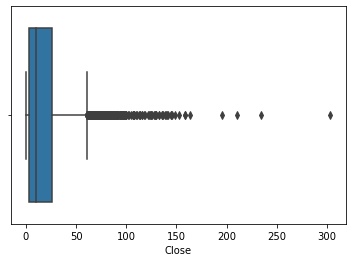

In [133]:
import seaborn as sns
sns.boxplot(df['Close'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

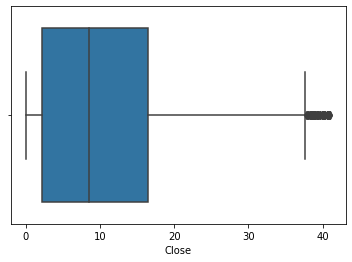

In [136]:
q1=df['Close'].quantile(q=0.25)
q3=df['Close'].quantile(q=0.75)
#On calcule l'écart interquartile (IQR)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
df=df[df['Close']<borne_sup]
df=df[df['Close']>borne_inf]
import seaborn as sns
sns.boxplot(df['Close'])


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='High'>

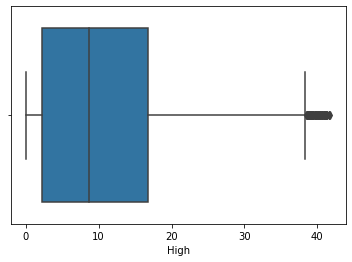

In [137]:
import seaborn as sns
sns.boxplot(df['High'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Low'>

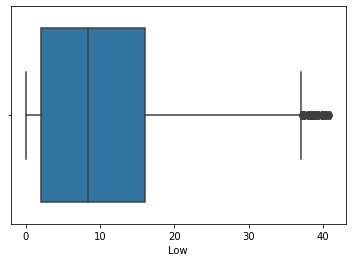

In [138]:
import seaborn as sns
sns.boxplot(df['Low'])

In [139]:
df['RETURN']=(df['Close']-df['Close'].shift(1))/df['Close'].shift(1)*100
df['RISK']=df['RETURN'].rolling(window=30).std()*np.sqrt(30)

In [140]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,RETURN,RISK
SYMBOL,,,,,,,,,,
AA,0,2023-04-11,40.5200,41.174999,40.150002,40.630001,40.630001,4280049.0,NaN,NaN
AAC,1,2023-04-11,10.3500,10.355000,10.340000,10.340000,10.340000,192818.0,-74.550825,NaN
AACG,2,2023-04-11,1.8991,1.970000,1.850000,1.970000,1.970000,8649.0,-80.947776,NaN
AACI,3,2023-04-11,10.1000,10.100000,10.100000,10.100000,10.100000,9118.0,412.690367,NaN
AADI,4,2023-04-11,7.2100,7.730000,7.210000,7.670000,7.670000,122626.0,-24.059408,NaN
...,...,...,...,...,...,...,...,...,...,...
ZVIA,5000,2023-04-11,3.9200,4.020000,3.820000,3.820000,3.820000,85213.0,-57.790057,20800.756866
ZWS,5001,2023-04-11,20.5800,21.020000,20.504999,20.809999,20.809999,1168308.0,444.764393,20785.498798
ZYME,5002,2023-04-11,9.3400,9.530000,8.726100,9.000000,9.000000,1026889.0,-56.751561,20801.670960


In [141]:
#RETURN AND RISK
mean = df['RETURN'].mean()
df['RETURN'].fillna(mean, inplace=True)
mean = df['RISK'].mean()
df['RISK'].fillna(mean, inplace=True)


In [142]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,RETURN,RISK
SYMBOL,,,,,,,,,,
AA,0,2023-04-11,40.5200,41.174999,40.150002,40.630001,40.630001,4280049.0,607.990091,12305.465457
AAC,1,2023-04-11,10.3500,10.355000,10.340000,10.340000,10.340000,192818.0,-74.550825,12305.465457
AACG,2,2023-04-11,1.8991,1.970000,1.850000,1.970000,1.970000,8649.0,-80.947776,12305.465457
AACI,3,2023-04-11,10.1000,10.100000,10.100000,10.100000,10.100000,9118.0,412.690367,12305.465457
AADI,4,2023-04-11,7.2100,7.730000,7.210000,7.670000,7.670000,122626.0,-24.059408,12305.465457
...,...,...,...,...,...,...,...,...,...,...
ZVIA,5000,2023-04-11,3.9200,4.020000,3.820000,3.820000,3.820000,85213.0,-57.790057,20800.756866
ZWS,5001,2023-04-11,20.5800,21.020000,20.504999,20.809999,20.809999,1168308.0,444.764393,20785.498798
ZYME,5002,2023-04-11,9.3400,9.530000,8.726100,9.000000,9.000000,1026889.0,-56.751561,20801.670960


In [143]:
import talib
df['RSI3'] = talib.RSI(df['Close'], timeperiod=3)
df['RSI7'] = talib.RSI(df['Close'], timeperiod=7)
df['RSI14'] = talib.RSI(df['Close'], timeperiod=14)

In [144]:
# Calculer le ROC pour les périodes 5 et 10
df['ROC5'] = talib.ROC(df['Close'], timeperiod=5)
df['ROC10'] = talib.ROC(df['Close'], timeperiod=10)
# Calculer le Momentum pour les périodes 5 et 10
df['MOM5'] = talib.MOM(df['Close'], timeperiod=5)
df['MOM10'] = talib.MOM(df['Close'], timeperiod=10)

In [145]:
willr = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
df['WILLIAMS %R'] = willr
# Set the lookback period
lookback_period = 20

# Calculate the EMA using the Pandas ewm function
ema = df['Close'].ewm(span=lookback_period, adjust=False).mean()
df['EMA'] = ema

In [146]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,RETURN,RISK,RSI3,RSI7,RSI14,ROC5,ROC10,MOM5,MOM10,WILLIAMS %R,EMA
SYMBOL,,,,,,,,,,,,,,,,,,,
AA,0,2023-04-11,40.5200,41.174999,40.150002,40.630001,40.630001,4280049.0,607.990091,12305.465457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.630001
AAC,1,2023-04-11,10.3500,10.355000,10.340000,10.340000,10.340000,192818.0,-74.550825,12305.465457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.745239
AACG,2,2023-04-11,1.8991,1.970000,1.850000,1.970000,1.970000,8649.0,-80.947776,12305.465457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.338073
AACI,3,2023-04-11,10.1000,10.100000,10.100000,10.100000,10.100000,9118.0,412.690367,12305.465457,17.375508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.029686
AADI,4,2023-04-11,7.2100,7.730000,7.210000,7.670000,7.670000,122626.0,-24.059408,12305.465457,16.119758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.709715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,5000,2023-04-11,3.9200,4.020000,3.820000,3.820000,3.820000,85213.0,-57.790057,20800.756866,34.131536,44.617590,47.589849,-62.290228,28.187916,-6.310000,0.840000,-90.255093,11.819015
ZWS,5001,2023-04-11,20.5800,21.020000,20.504999,20.809999,20.809999,1168308.0,444.764393,20785.498798,63.285173,54.717051,52.634537,1184.567864,3101.538497,19.189999,20.159999,-44.426222,12.675299
ZYME,5002,2023-04-11,9.3400,9.530000,8.726100,9.000000,9.000000,1026889.0,-56.751561,20801.670960,43.301796,47.667633,49.096893,-68.630185,-75.675676,-19.690001,-28.000000,-76.282547,12.325270


In [147]:
adx = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
df['ADX'] = adx

In [148]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,RETURN,RISK,RSI3,RSI7,RSI14,ROC5,ROC10,MOM5,MOM10,WILLIAMS %R,EMA,ADX
SYMBOL,,,,,,,,,,,,,,,,,,,,
AA,0,2023-04-11,40.5200,41.174999,40.150002,40.630001,40.630001,4280049.0,607.990091,12305.465457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.630001,NaN
AAC,1,2023-04-11,10.3500,10.355000,10.340000,10.340000,10.340000,192818.0,-74.550825,12305.465457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.745239,NaN
AACG,2,2023-04-11,1.8991,1.970000,1.850000,1.970000,1.970000,8649.0,-80.947776,12305.465457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.338073,NaN
AACI,3,2023-04-11,10.1000,10.100000,10.100000,10.100000,10.100000,9118.0,412.690367,12305.465457,17.375508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.029686,NaN
AADI,4,2023-04-11,7.2100,7.730000,7.210000,7.670000,7.670000,122626.0,-24.059408,12305.465457,16.119758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.709715,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,5000,2023-04-11,3.9200,4.020000,3.820000,3.820000,3.820000,85213.0,-57.790057,20800.756866,34.131536,44.617590,47.589849,-62.290228,28.187916,-6.310000,0.840000,-90.255093,11.819015,5.742800
ZWS,5001,2023-04-11,20.5800,21.020000,20.504999,20.809999,20.809999,1168308.0,444.764393,20785.498798,63.285173,54.717051,52.634537,1184.567864,3101.538497,19.189999,20.159999,-44.426222,12.675299,5.860764
ZYME,5002,2023-04-11,9.3400,9.530000,8.726100,9.000000,9.000000,1026889.0,-56.751561,20801.670960,43.301796,47.667633,49.096893,-68.630185,-75.675676,-19.690001,-28.000000,-76.282547,12.325270,5.452570


In [150]:
mean = df['RSI3'].mean()
df['RSI3'].fillna(mean, inplace=True)
mean = df['RSI7'].mean()
df['RSI7'].fillna(mean, inplace=True)
mean = df['RSI14'].mean()
df['RSI14'].fillna(mean, inplace=True)


In [151]:
mean = df['ROC5'].mean()
df['ROC5'].fillna(mean, inplace=True)
mean = df['ROC10'].mean()
df['ROC10'].fillna(mean, inplace=True)


In [152]:
mean = df['MOM5'].mean()
df['MOM5'].fillna(mean, inplace=True)
mean = df['MOM10'].mean()
df['MOM10'].fillna(mean, inplace=True)

In [153]:
mean = df['WILLIAMS %R'].mean()
df['WILLIAMS %R'].fillna(mean, inplace=True)
mean = df['ADX'].mean()
df['ADX'].fillna(mean, inplace=True)

In [154]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,RETURN,RISK,RSI3,RSI7,RSI14,ROC5,ROC10,MOM5,MOM10,WILLIAMS %R,EMA,ADX
SYMBOL,,,,,,,,,,,,,,,,,,,,
AA,0,2023-04-11,40.5200,41.174999,40.150002,40.630001,40.630001,4280049.0,607.990091,12305.465457,49.603635,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,40.630001,5.507890
AAC,1,2023-04-11,10.3500,10.355000,10.340000,10.340000,10.340000,192818.0,-74.550825,12305.465457,49.603635,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,37.745239,5.507890
AACG,2,2023-04-11,1.8991,1.970000,1.850000,1.970000,1.970000,8649.0,-80.947776,12305.465457,49.603635,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,34.338073,5.507890
AACI,3,2023-04-11,10.1000,10.100000,10.100000,10.100000,10.100000,9118.0,412.690367,12305.465457,17.375508,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,32.029686,5.507890
AADI,4,2023-04-11,7.2100,7.730000,7.210000,7.670000,7.670000,122626.0,-24.059408,12305.465457,16.119758,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,29.709715,5.507890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,5000,2023-04-11,3.9200,4.020000,3.820000,3.820000,3.820000,85213.0,-57.790057,20800.756866,34.131536,44.617590,47.589849,-62.290228,28.187916,-6.310000,0.840000,-90.255093,11.819015,5.742800
ZWS,5001,2023-04-11,20.5800,21.020000,20.504999,20.809999,20.809999,1168308.0,444.764393,20785.498798,63.285173,54.717051,52.634537,1184.567864,3101.538497,19.189999,20.159999,-44.426222,12.675299,5.860764
ZYME,5002,2023-04-11,9.3400,9.530000,8.726100,9.000000,9.000000,1026889.0,-56.751561,20801.670960,43.301796,47.667633,49.096893,-68.630185,-75.675676,-19.690001,-28.000000,-76.282547,12.325270,5.452570


In [155]:
df=df.drop(['Close','High','Low','Open','Adj Close','Volume'], axis=1)

In [156]:
df

,index,Date,RETURN,RISK,RSI3,RSI7,RSI14,ROC5,ROC10,MOM5,MOM10,WILLIAMS %R,EMA,ADX
SYMBOL,,,,,,,,,,,,,,
AA,0,2023-04-11,607.990091,12305.465457,49.603635,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,40.630001,5.507890
AAC,1,2023-04-11,-74.550825,12305.465457,49.603635,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,37.745239,5.507890
AACG,2,2023-04-11,-80.947776,12305.465457,49.603635,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,34.338073,5.507890
AACI,3,2023-04-11,412.690367,12305.465457,17.375508,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,32.029686,5.507890
AADI,4,2023-04-11,-24.059408,12305.465457,16.119758,49.938020,49.965815,565.176647,1379.835023,-0.005747,0.002807,-67.619548,29.709715,5.507890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,5000,2023-04-11,-57.790057,20800.756866,34.131536,44.617590,47.589849,-62.290228,28.187916,-6.310000,0.840000,-90.255093,11.819015,5.742800
ZWS,5001,2023-04-11,444.764393,20785.498798,63.285173,54.717051,52.634537,1184.567864,3101.538497,19.189999,20.159999,-44.426222,12.675299,5.860764
ZYME,5002,2023-04-11,-56.751561,20801.670960,43.301796,47.667633,49.096893,-68.630185,-75.675676,-19.690001,-28.000000,-76.282547,12.325270,5.452570
